In [ ]:
from configparser import ConfigParser

config = ConfigParser()
config.read('config.ini')
config['augmentations']['pad_trunc_noise_multiplier']


In [ ]:
from torchsummary import summary
summary(model, (1,257, 63))

In [ ]:
import numpy
path = 'E:/Original Audio/New folder/for_release/for_release/OV10/overlap_ratio_10.0_sil0.1_1.0_session2_actual10.0/transcription/meeting_info.txt'

# import text as tsv, with header and only first 2 columns
timestamps = numpy.genfromtxt(path, delimiter='\t', dtype=None, encoding=None, names=True, usecols=(0,1))

In [ ]:
import numpy as np
ground_truth = np.zeros((timestamps.shape[0]+1, 3))
ground_truth[0] = [0, timestamps[0][0], 0] 

for i , (start_time, end_time) in enumerate(timestamps):
    next_start_time = timestamps[i+1][0] if i+1 < len(timestamps) else end_time
    if end_time > next_start_time:
        ground_truth[i+1] = [next_start_time, end_time, 2]
    elif end_time < next_start_time:
        ground_truth[i+1] = [end_time, next_start_time, 0]
    else:
        ground_truth[i+1] = [end_time, next_start_time, 1]

# export groundtruth as tsv in the same directory as path
np.savetxt('mix.txt', ground_truth, delimiter='\t', fmt='%s')

In [ ]:
import torch

batch = torch.randn([2,1,128,63])
batch

In [ ]:
from docx import Document
import glob


# glob through all the files in the directory get docx
word_paths = glob.glob('C:/Users/Jian Quan/OneDrive/Desktop/Intern/ITP Worklog Reflection/*.docx')

for word_path in word_paths:
    document = Document(word_path)

    # Loop through the tables in the document
    for table in document.tables:
        # Loop through the rows in the table
        for row in table.rows:
            # Loop through the cells in the row
            for cell in row.cells:
            # Print the cell's text if Reflection inside
                if 'Reflection*2' in cell.text:
                    # replace the text with empty string
                    cell.text = ''
                    cell.width = 0
    
    # select last 2 lines
    for paragraph in document.paragraphs[-2:]:
        # replace the text with empty string
        paragraph.text = ''

    # Save the document in a folder called cleaned
    document.save(f'./cleaned/{os.path.basename(word_path)}')


In [1]:
import torch, torchaudio
import torch_audiomentations as aug
import IPython.display as ipd

wav, sr = torchaudio.load('./data/omni mic/real/1speaker_2.wav')

wav1 = wav[:, 160000:176000]*100
wav2 = wav[:, 176000:192000]

batch = torch.stack([wav1, wav2])

print(batch)
# remove dc
batch = batch - batch.mean(dim=2, keepdim=True)

apply_augmentation = aug.Compose(
    transforms=[
        aug.PeakNormalization(p=1),
        # aug.AddBackgroundNoise(p=1, background_paths='E:/Processed Audio/backgroundNoise', min_snr_in_db=-3,max_snr_in_db=0)
    ]
)



print(batch)
augmented_batch = apply_augmentation(batch, sr)

c:\anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


tensor([[[0.9163, 0.9189, 0.7681,  ..., 0.4186, 0.4104, 0.3926]],

        [[0.0042, 0.0045, 0.0048,  ..., 0.0135, 0.0122, 0.0106]]])
tensor([[[ 0.0884,  0.0910, -0.0599,  ..., -0.4093, -0.4175, -0.4354]],

        [[-0.0040, -0.0038, -0.0034,  ...,  0.0053,  0.0040,  0.0024]]])


In [4]:
wav2_new = torchaudio.functional.pitch_shift(wav2, 8000, 30)
print(wav2)
print(wav2_new)

tensor([[0.0042, 0.0045, 0.0048,  ..., 0.0135, 0.0122, 0.0106]])
tensor([[ 0.0028,  0.0052,  0.0044,  ..., -0.0029, -0.0100, -0.0117]])


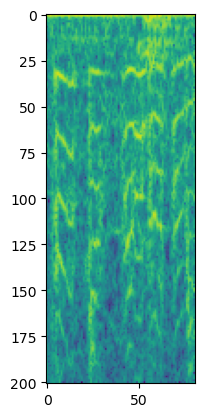

In [5]:

import matplotlib.pyplot as plt
spec = torchaudio.transforms.Spectrogram()(wav2_new)[0].log10()
plt.imshow(spec)


In [ ]:
ipd.Audio(batch[0][0], rate = 8000)

In [ ]:
ipd.Audio(augmented_batch[0][0], rate = 8000)
torchaudio.save('test.wav', augmented_batch[0], 8000)

In [ ]:
ipd.Audio(batch[1][0], rate = 8000)

In [ ]:
ipd.Audio(augmented_batch[1][0], rate = 8000)

In [15]:
import torch, torchaudio
import torch_audiomentations as aug
from glob import glob

testAudios = glob('*.wav')

for i, testAudio in enumerate(testAudios):
    wav, sr = torchaudio.load(testAudio)
    if i == 0:
        combinedWAV = wav
    else:
        combinedWAV = torch.cat((combinedWAV, wav),1)


torchaudio.save('combinedWAV.wav',src = combinedWAV, sample_rate=sr)

In [ ]:
import torch, torchaudio
from glob import glob

testAudios = glob('*.wav')

for i, testAudio in enumerate(testAudios):
    wav, sr = torchaudio.load(testAudio)
    if i == 0:
        combinedWAV = wav
    else:
        combinedWAV = torch.cat((combinedWAV, wav),1)


torchaudio.save('combinedWAV.wav',src = combinedWAV, sample_rate=sr)